In [55]:
from scipy import signal
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz,cheby1,cheby2,freqs
from scipy.fft import fft, fftfreq,ifft,fftshift
import warnings
warnings.filterwarnings("ignore")
#-------------------------------------------------------------------------------------------------
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE, titleweight='bold')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, labelweight='bold')    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [56]:
def sinal_test(x,omega):
    return np.sin(omega*x)+np.sin(3*omega*x)
#-------------------------------------------------------------------------------
def sinal_a(x,omega):
    return np.sin(omega*x)
#-------------------------------------------------------------------------------
def sinal_b(x):
    return np.where(abs(x)<=1.0, 0.0, 1.0)
#-------------------------------------------------------------------------------
def sinal_c(x,a,b):
  y=np.zeros(len(x))
  index1=np.where((x>-a/2) & (x<0))
  y[index1]=2*(b/a)*x[index1]+b
  index2=np.where((x>0) & (x<a/2))
  y[index2]=-2*(b/a)*x[index2]+b
  return y
#-------------------------------------------------------------------------------
def sinal_d(x,a,b):
  y=np.zeros(len(x))
  index=np.where((x>-a/2) & (x<0))
  y[index]=-2*(b/a)*x[index]
  return y
#-------------------------------------------------------------------------------
def cheby1_lowpass(cutoff, fs, rp,order):
  nyq = 0.5 * fs
  normalized_cutoff = cutoff / nyq
  b, a =cheby1(order,rp, normalized_cutoff, btype='lowpass', analog=False)
  return b, a
#-------------------------------------------------------------------------------
def cheby1_lowpass_filter(data, cutoff, fs,rp, order):
  b, a = cheby1_lowpass(cutoff, fs,rp, order=order)
  y = lfilter(b, a, data)
  return y
#-------------------------------------------------------------------------------
def cheby2_lowpass(cutoff, fs, rp,order):
  nyq = 0.5 * fs
  normalized_cutoff = cutoff / nyq
  b, a =cheby2(order,rp, normalized_cutoff, btype='lowpass', analog=False)
  return b, a
#-------------------------------------------------------------------------------
def cheby2_lowpass_filter(data, cutoff, fs,rp, order):
  b, a = cheby2_lowpass(cutoff, fs,rp, order=order)
  y = lfilter(b, a, data)
  return y
#-------------------------------------------------------------------------------
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normalized_cutoff = cutoff / nyq
    b, a = butter(order, normalized_cutoff, btype='lowpass', analog=False)
    return b, a
#-------------------------------------------------------------------------------
def butter_lowpass_filter(data, cutoff, fs, order):
  b, a = butter_lowpass(cutoff, fs, order=order)
  y = lfilter(b, a, data)
  return y
#-------------------------------------------------------------------------------
def brickwall(xf,yf,cutoff):
  for i in range(len(xf)):  
    if xf[i]>=cutoff or xf[i]<=-cutoff:
      yf[i]=0
  return yf  

In [57]:
# definine params
fs = 100
sim_time = 60
nsamps = int(fs*sim_time)
cutoff=5
order=4
rp=0.01
rs=0.01

x_min=-2
x_max=2
y_min=0.0
f_min=-((fs/2)+10)
f_max=(fs/2)+10

# **Signal d**

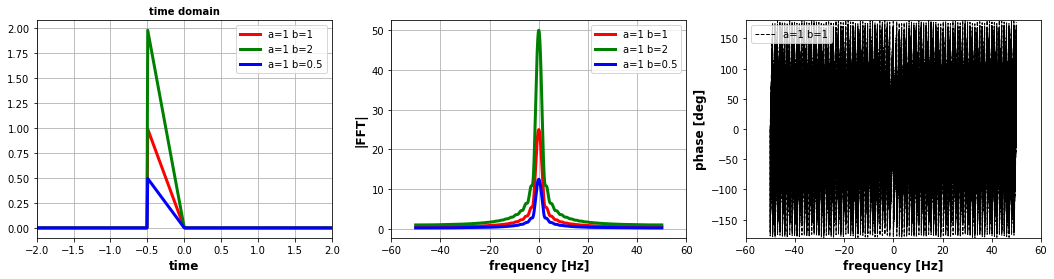

In [58]:
# generate input signal
time = np.linspace(-sim_time/2, sim_time/2, nsamps)
b=[1,2,0.5]
cor=['r','g','b']
i=0
plt.figure(figsize=(18,4))
for each_b in b:
  data=sinal_d(time,1,each_b)
  yf = fft(data)
  xf = fftfreq(nsamps, 1 / fs)

  plt.subplot(131)
  plt.plot(time, data,cor[i],lw=3,label=f"a=1 b={each_b}")
  plt.xlabel("time")
  plt.title('time domain')
  plt.xlim(x_min,x_max)
  plt.grid()
  plt.legend()

  plt.subplot(132)
  plt.plot(fftshift(xf), np.absolute(fftshift(yf)),cor[i],lw=3,label=f"a=1 b={each_b}")
  plt.xlabel("frequency [Hz]")
  plt.ylabel("|FFT|")
  plt.xlim(f_min,f_max)
  plt.grid()
  plt.legend()

  if i==0:
    plt.subplot(133)
    plt.plot(fftshift(xf), np.angle(fftshift(yf),deg=True),'k--',lw=1,label=f"a=1 b={each_b}")
    plt.ylim(-180,180)
    plt.xlim(f_min,f_max)
    plt.ylabel("phase [deg]")
    plt.xlabel("frequency [Hz]")
    plt.legend()
  i=i+1
plt.savefig("sinal_d_fft.png",dpi=300)

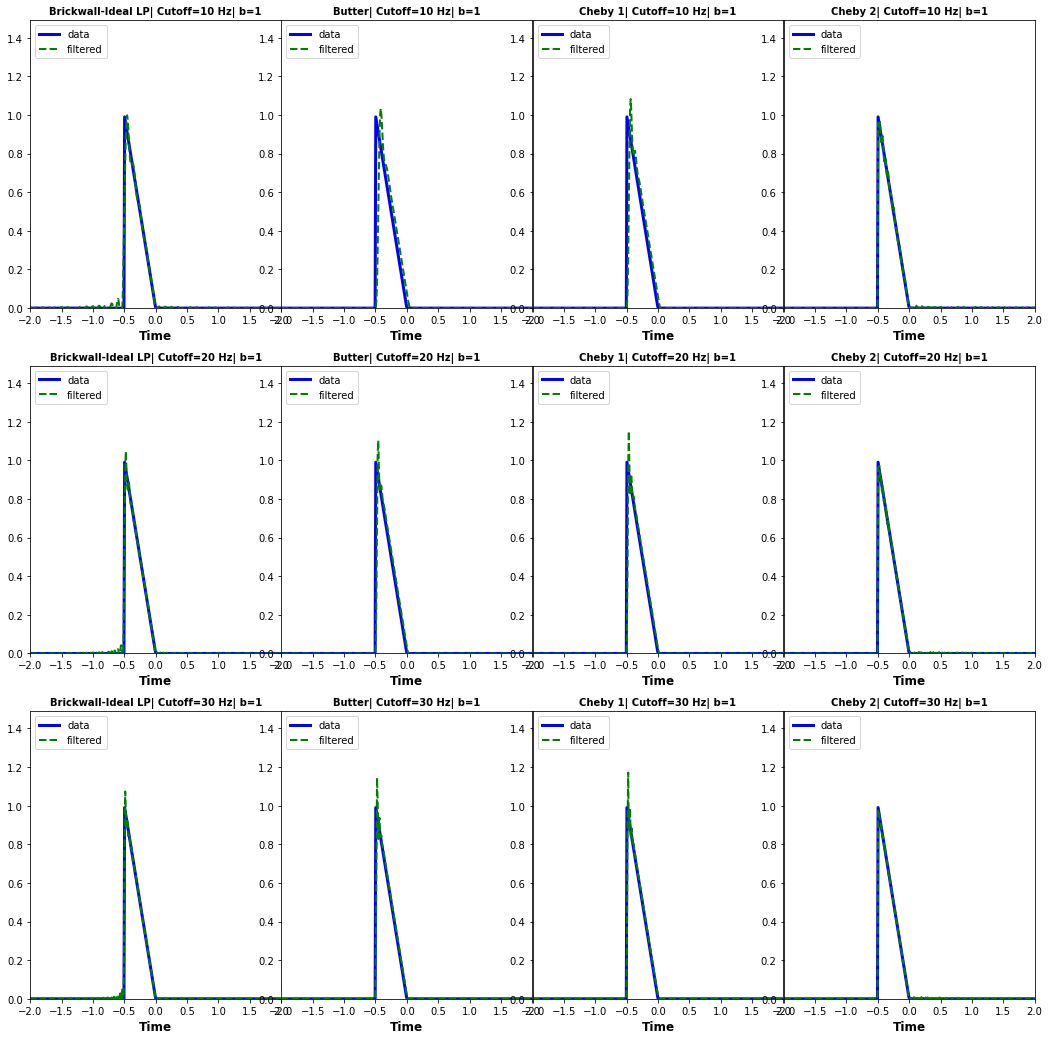

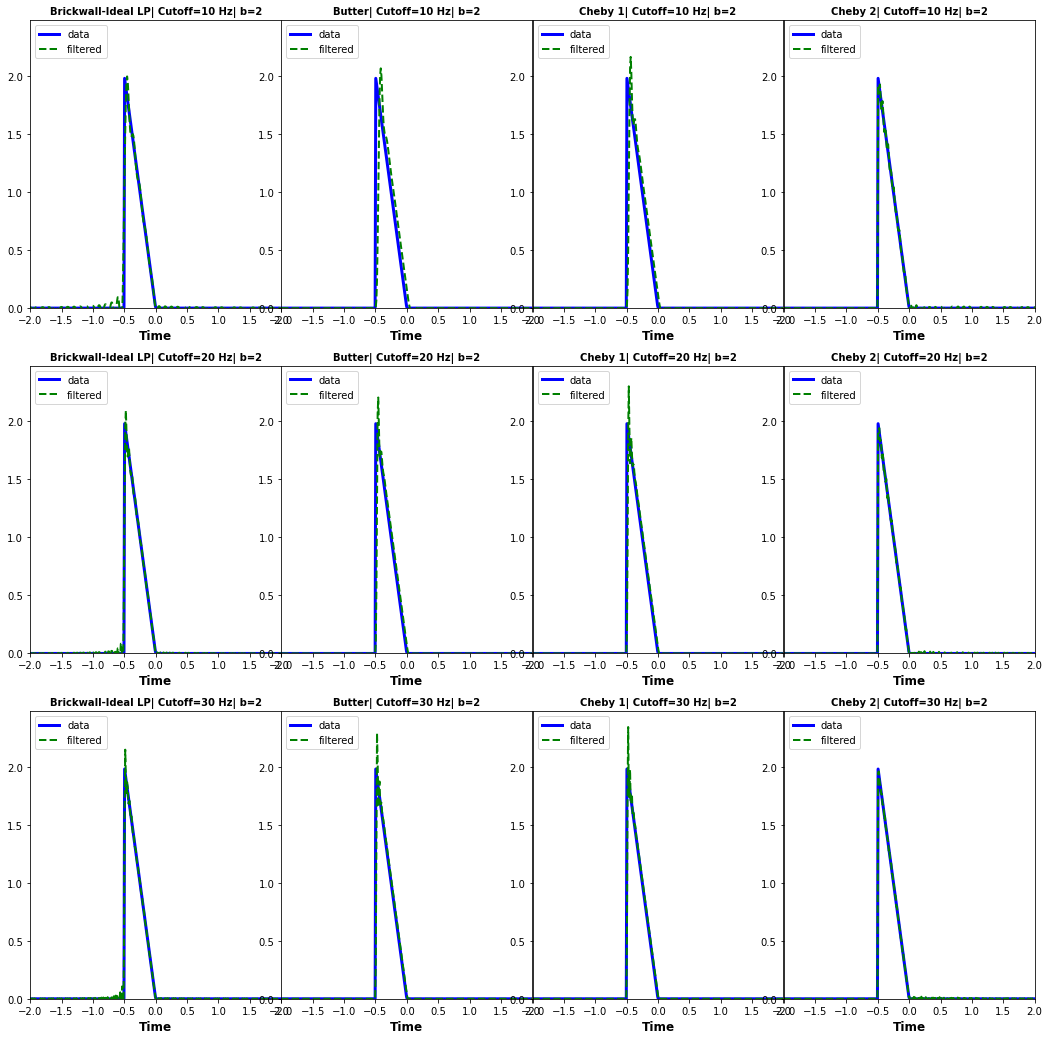

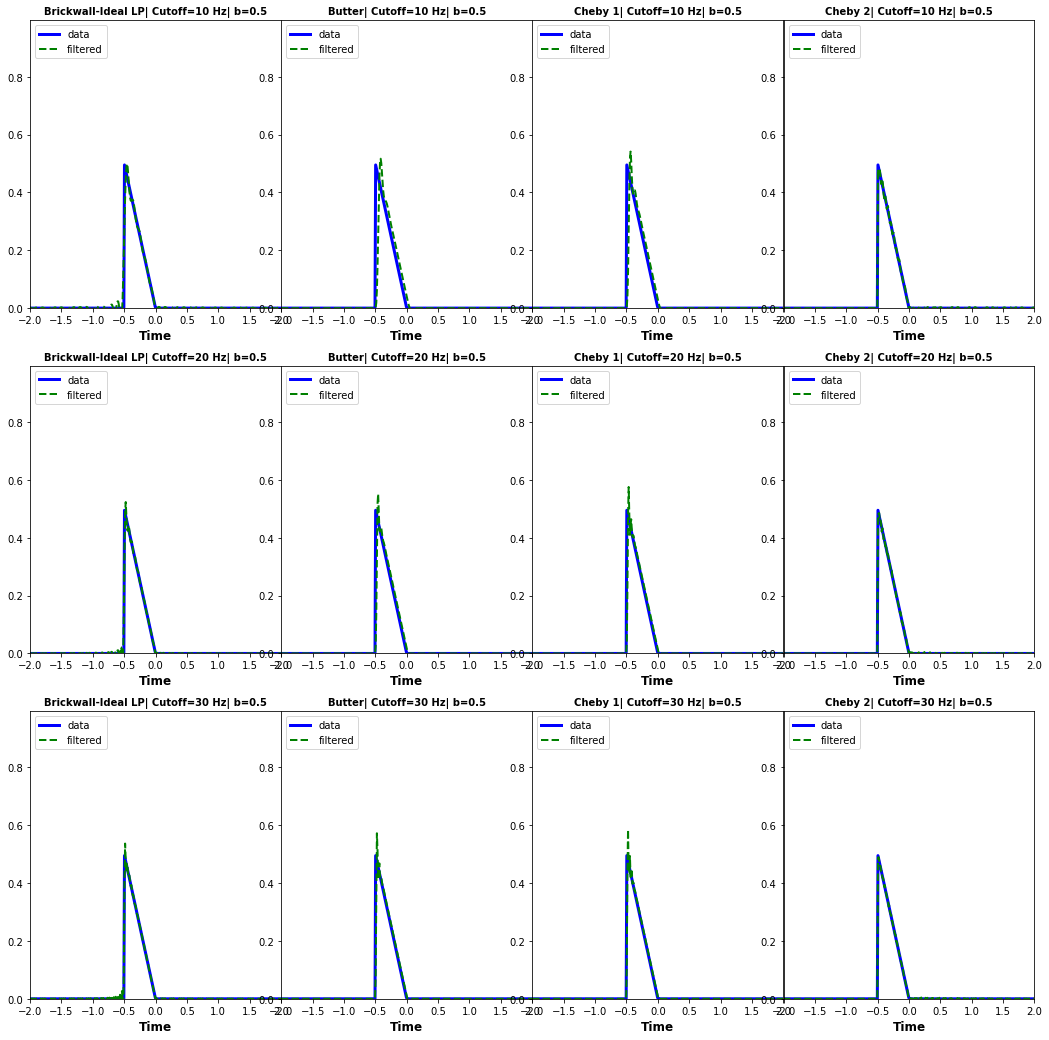

In [59]:
# generate input signal
time = np.linspace(-sim_time/2, sim_time/2, nsamps)
b=[1,2,0.5]
cutoff=[10,20,30]
cor=['r','g','b']

for each_b in b:
  i=0
  plt.figure(figsize=(18,18))
  for each_cut in cutoff:
    data=sinal_d(time,1,each_b)
    y_max=data.max()+0.5
    yf = fft(data)
    xf = fftfreq(nsamps, 1 / fs)
    filt_brick = ifft(brickwall(xf,yf,each_cut))    
    filt_butter = butter_lowpass_filter(data, each_cut, fs, order)
    filt_cheby1 = cheby1_lowpass_filter(data, each_cut, fs,rp, order)
    filt_cheby2 = cheby2_lowpass_filter(data, each_cut, fs,rs, order)  
    plt.subplots_adjust(wspace = .001)
    
    plt.subplot(3,4,1+i)
    plt.plot(time, data, 'b-',linewidth=3, label='data')
    plt.plot(time, filt_brick, 'g--', linewidth=2, label='filtered')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.xlabel('Time')
    plt.title(f"Brickwall-Ideal LP| Cutoff={each_cut} Hz| b={each_b}")
    plt.legend(loc='upper left')

    plt.subplot(3,4,2+i)
    plt.plot(time, data, 'b-',linewidth=3, label='data')
    plt.plot(time, filt_butter, 'g--', linewidth=2, label='filtered')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.xlabel('Time')
    plt.title(f"Butter| Cutoff={each_cut} Hz| b={each_b}")
    plt.legend(loc='upper left')

    plt.subplot(3,4,3+i)
    plt.plot(time, data, 'b-',linewidth=3, label='data')
    plt.plot(time, filt_cheby1, 'g--', linewidth=2, label='filtered')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.xlabel('Time')
    plt.title(f"Cheby 1| Cutoff={each_cut} Hz| b={each_b}")
    plt.legend(loc='upper left')

    plt.subplot(3,4,4+i)
    plt.plot(time, data, 'b-',linewidth=3, label='data')
    plt.plot(time, filt_cheby2, 'g--', linewidth=2, label='filtered')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.xlabel('Time')
    plt.title(f"Cheby 2| Cutoff={each_cut} Hz| b={each_b}")
    plt.legend(loc='upper left')
    
    i=i+4
  plt.savefig(f"sinal_d_reconstruction b={each_b}.png",dpi=300)  


# **Sinal c**

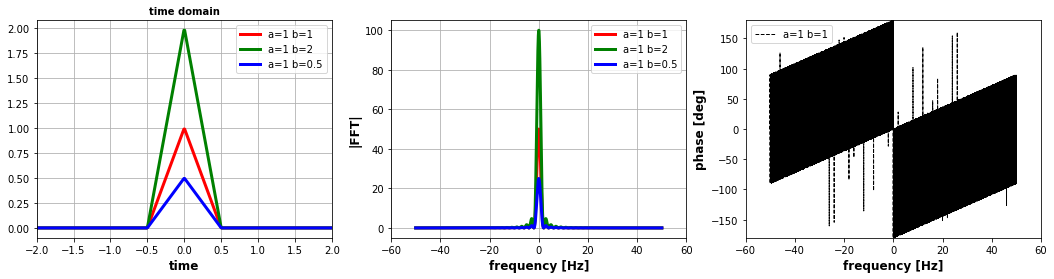

In [60]:
# generate input signal
time = np.linspace(-sim_time/2, sim_time/2, nsamps)
b=[1,2,0.5]
cor=['r','g','b']
i=0
plt.figure(figsize=(18,4))
for each_b in b:
  data=sinal_c(time,1,each_b)
  yf = fft(data)
  xf = fftfreq(nsamps, 1 / fs)

  plt.subplot(131)
  plt.plot(time, data,cor[i],lw=3,label=f"a=1 b={each_b}")
  plt.xlabel("time")
  plt.title('time domain')
  plt.xlim(x_min,x_max)
  plt.grid()
  plt.legend()

  plt.subplot(132)
  plt.plot(fftshift(xf), np.absolute(fftshift(yf)),cor[i],lw=3,label=f"a=1 b={each_b}")
  plt.xlabel("frequency [Hz]")
  plt.ylabel("|FFT|")
  plt.xlim(f_min,f_max)
  #plt.xlim(-20,20)

  plt.grid()
  plt.legend()

  if i==0:
    plt.subplot(133)
    plt.plot(fftshift(xf), np.angle(fftshift(yf),deg=True),'k--',lw=1,label=f"a=1 b={each_b}")
    plt.ylim(-180,180)
    plt.xlim(f_min,f_max)
    plt.ylabel("phase [deg]")
    plt.xlabel("frequency [Hz]")
    plt.legend()
  i=i+1
plt.savefig("sinal_c_fft.png",dpi=300)  


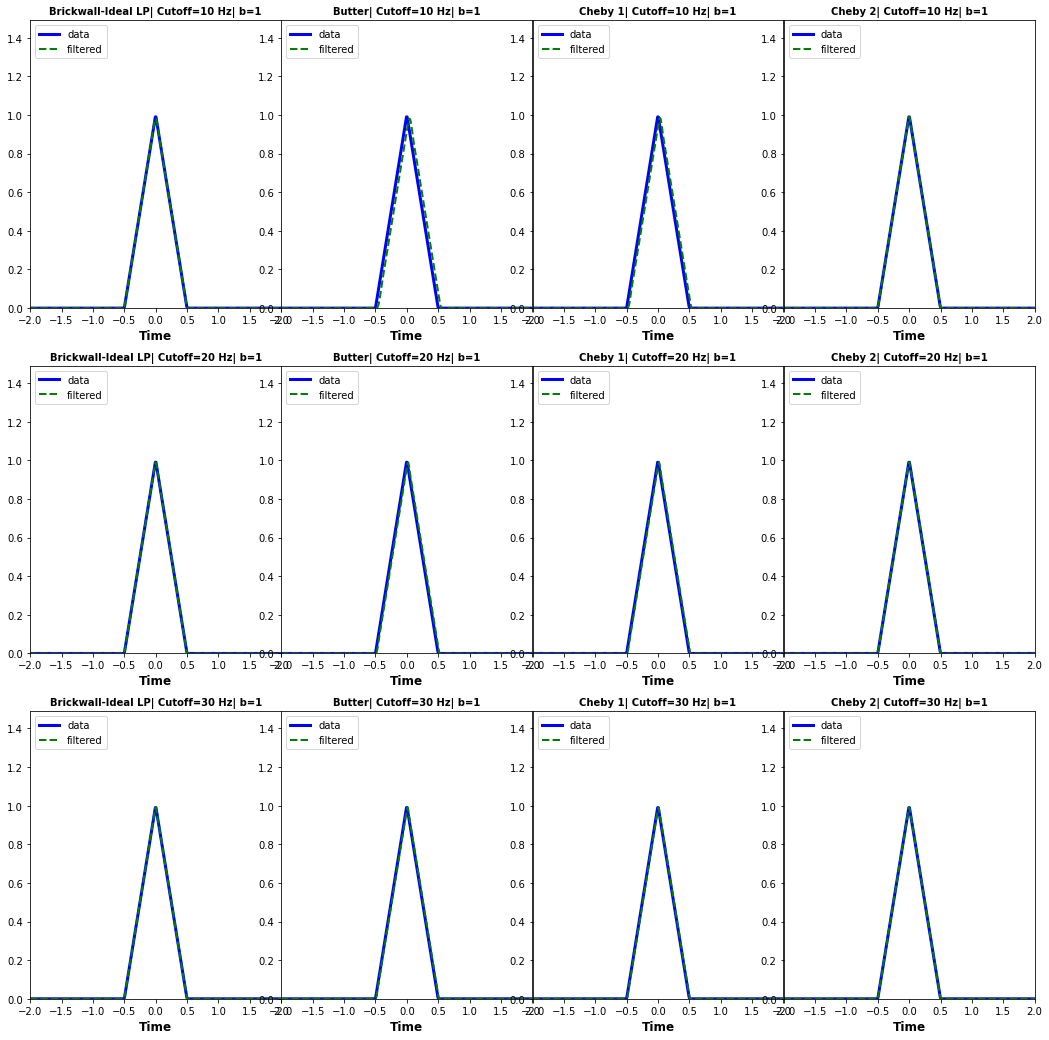

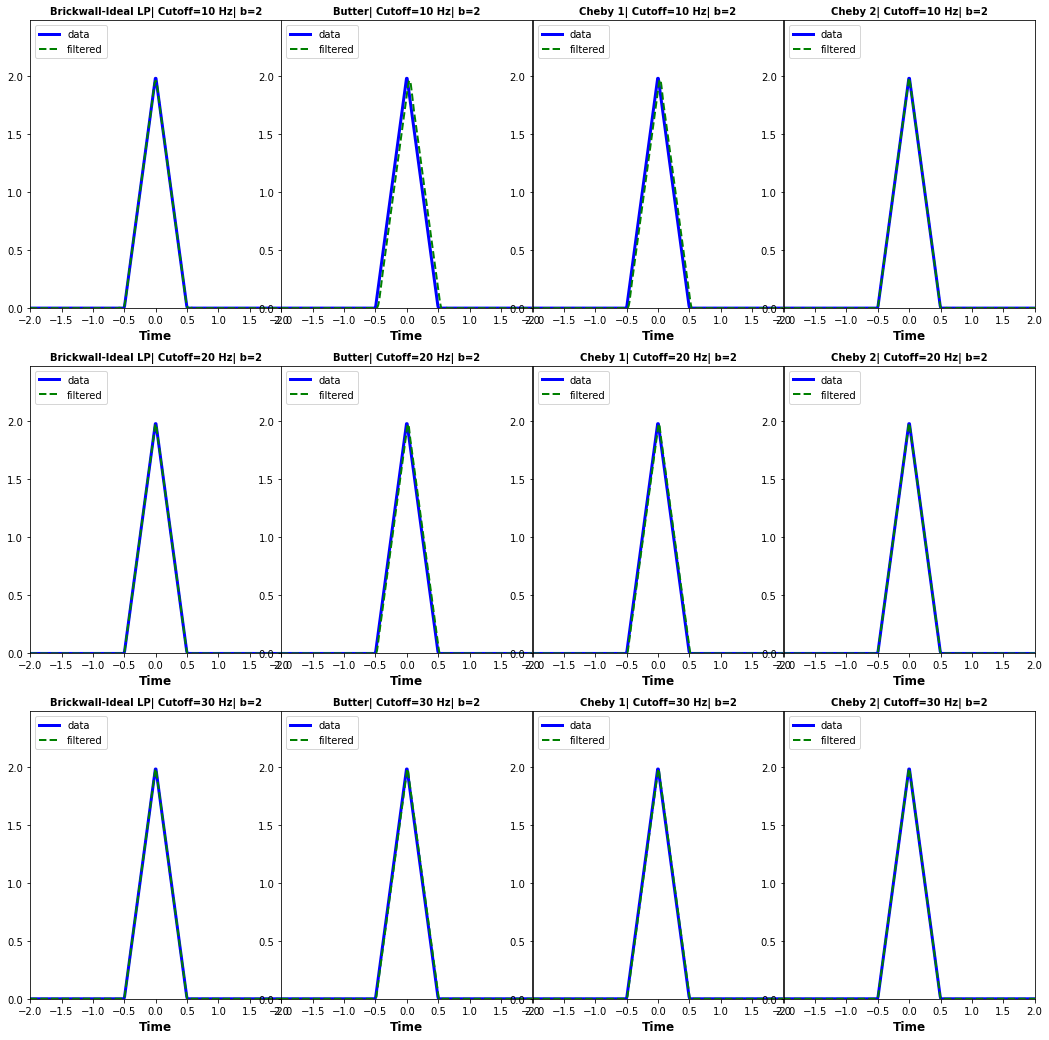

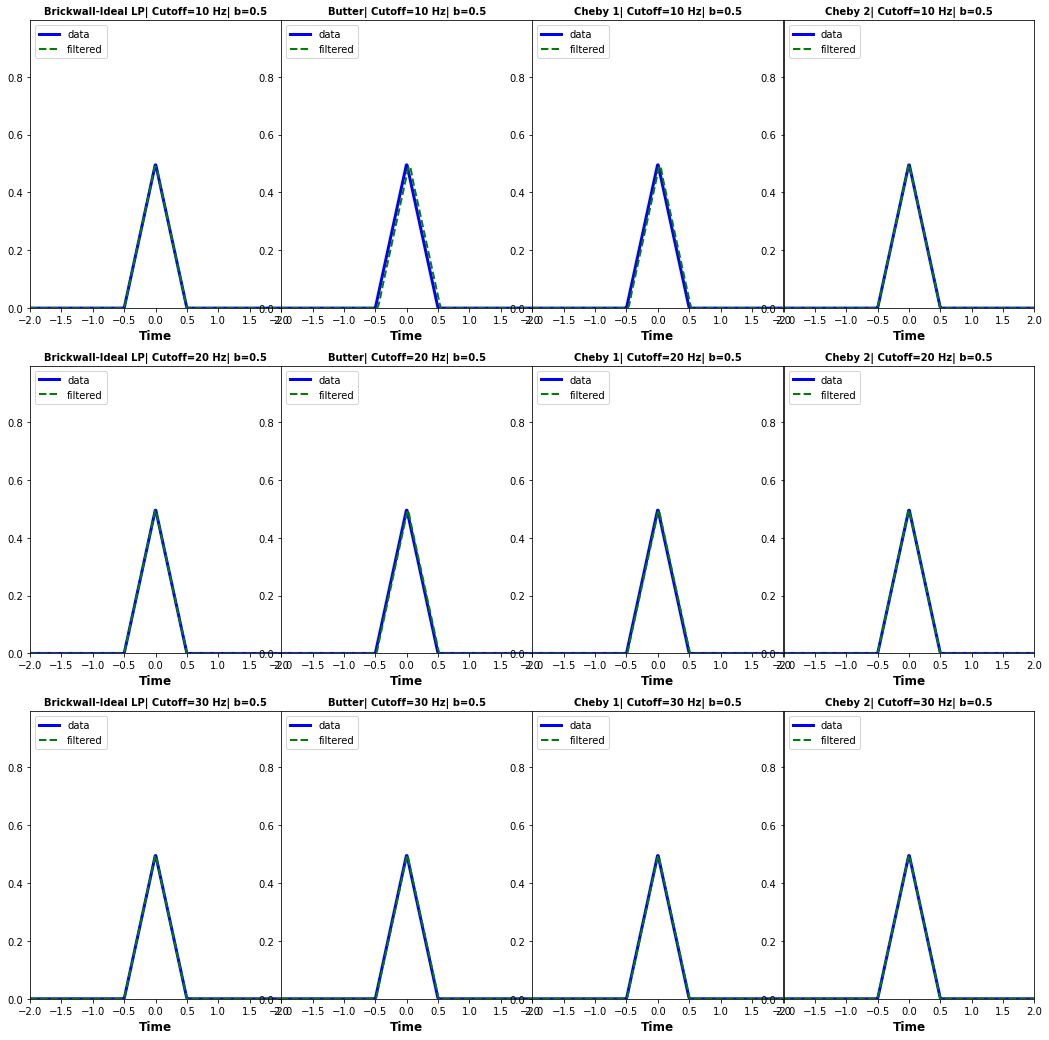

In [61]:
# generate input signal
time = np.linspace(-sim_time/2, sim_time/2, nsamps)
b=[1,2,0.5]
cutoff=[10,20,30]
cor=['r','g','b']

for each_b in b:
  i=0
  plt.figure(figsize=(18,18))
  for each_cut in cutoff:
    data=sinal_c(time,1,each_b)
    y_max=data.max()+0.5
    yf = fft(data)
    xf = fftfreq(nsamps, 1 / fs)
    filt_brick = ifft(brickwall(xf,yf,each_cut))    
    filt_butter = butter_lowpass_filter(data, each_cut, fs, order)
    filt_cheby1 = cheby1_lowpass_filter(data, each_cut, fs,rp, order)
    filt_cheby2 = cheby2_lowpass_filter(data, each_cut, fs,rs, order)  
    plt.subplots_adjust(wspace = .001)
    
    plt.subplot(3,4,1+i)
    plt.plot(time, data, 'b-',linewidth=3, label='data')
    plt.plot(time, filt_brick, 'g--', linewidth=2, label='filtered')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.xlabel('Time')
    plt.title(f"Brickwall-Ideal LP| Cutoff={each_cut} Hz| b={each_b}")
    plt.legend(loc='upper left')

    plt.subplot(3,4,2+i)
    plt.plot(time, data, 'b-',linewidth=3, label='data')
    plt.plot(time, filt_butter, 'g--', linewidth=2, label='filtered')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.xlabel('Time')
    plt.title(f"Butter| Cutoff={each_cut} Hz| b={each_b}")
    plt.legend(loc='upper left')

    plt.subplot(3,4,3+i)
    plt.plot(time, data, 'b-',linewidth=3, label='data')
    plt.plot(time, filt_cheby1, 'g--', linewidth=2, label='filtered')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.xlabel('Time')
    plt.title(f"Cheby 1| Cutoff={each_cut} Hz| b={each_b}")
    plt.legend(loc='upper left')

    plt.subplot(3,4,4+i)
    plt.plot(time, data, 'b-',linewidth=3, label='data')
    plt.plot(time, filt_cheby2, 'g--', linewidth=2, label='filtered')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.xlabel('Time')
    plt.title(f"Cheby 2| Cutoff={each_cut} Hz| b={each_b}")
    plt.legend(loc='upper left')
    
    i=i+4
  plt.savefig(f"sinal_c_reconstruction b={each_b}.png",dpi=300)  


# **Sinal b**

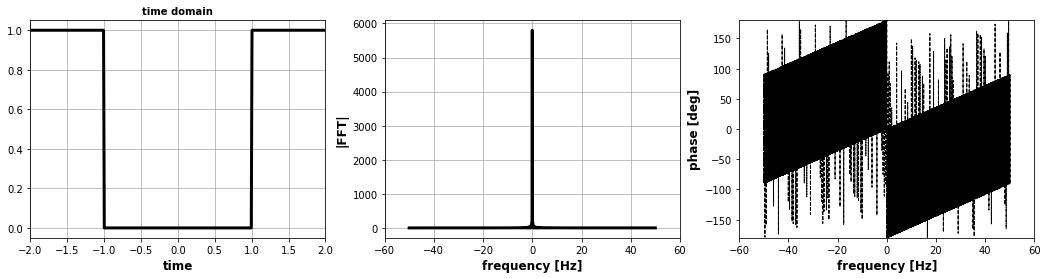

In [62]:
# generate input signal
time = np.linspace(-sim_time/2, sim_time/2, nsamps)
i=0
plt.figure(figsize=(18,4))
data=sinal_b(time)
yf = fft(data)
xf = fftfreq(nsamps, 1 / fs)

plt.subplot(131)
plt.plot(time, data,'k',lw=3)
plt.xlabel("time")
plt.title('time domain')
plt.xlim(x_min,x_max)
plt.grid()


plt.subplot(132)
plt.plot(fftshift(xf), np.absolute(fftshift(yf)),'k',lw=3)
plt.xlabel("frequency [Hz]")
plt.ylabel("|FFT|")
plt.xlim(f_min,f_max)
#plt.xlim(-10,10)
plt.grid()

plt.subplot(133)
plt.plot(fftshift(xf), np.angle(fftshift(yf),deg=True),'k--',lw=1)
plt.ylim(-180,180)
plt.xlim(f_min,f_max)
plt.ylabel("phase [deg]")
plt.xlabel("frequency [Hz]")

plt.savefig("sinal_b_fft.png",dpi=300)  


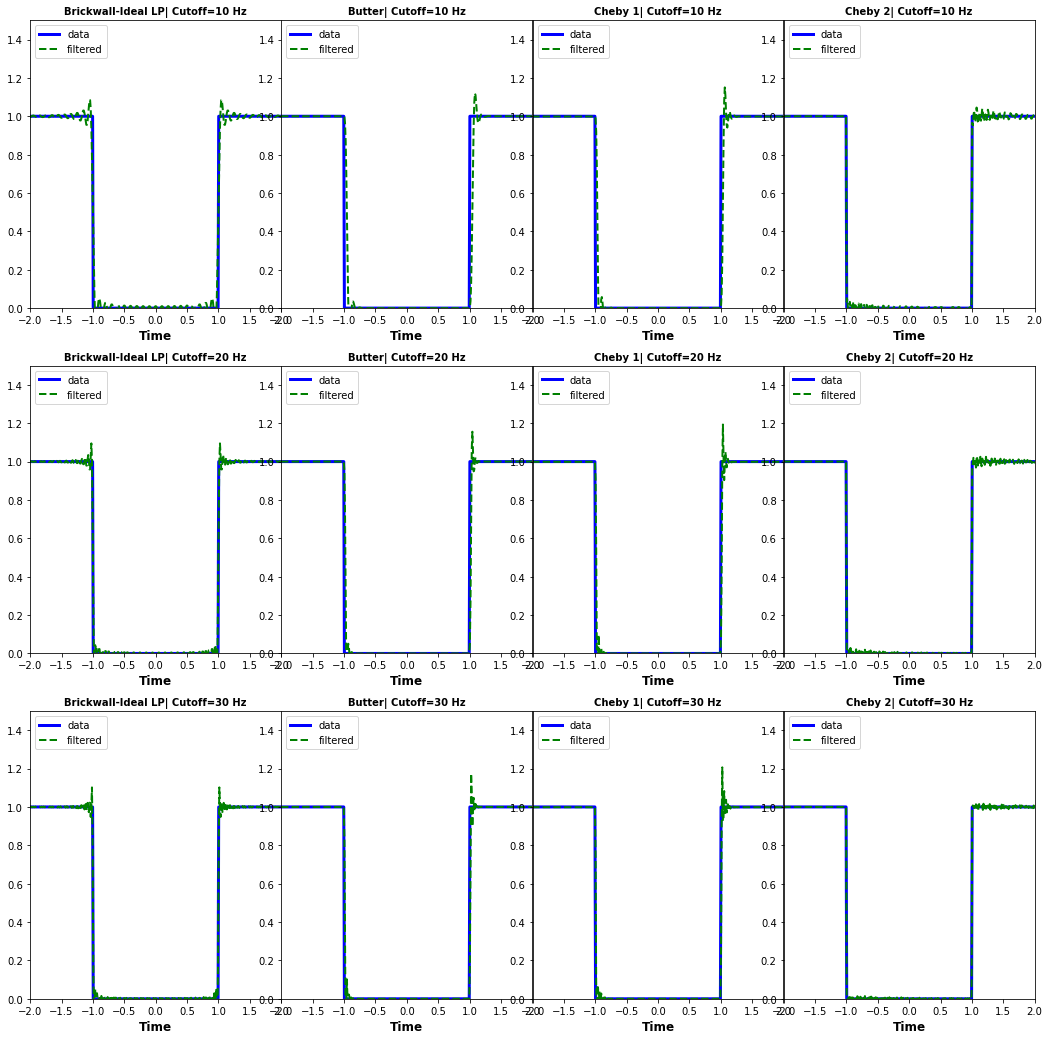

In [63]:
# generate input signal
time = np.linspace(-sim_time/2, sim_time/2, nsamps)
cutoff=[10,20,30]
cor=['r','g','b']

i=0
plt.figure(figsize=(18,18))
for each_cut in cutoff:
  data=sinal_b(time)
  y_max=data.max()+0.5
  yf = fft(data)
  xf = fftfreq(nsamps, 1 / fs)
  filt_brick = ifft(brickwall(xf,yf,each_cut))    
  filt_butter = butter_lowpass_filter(data, each_cut, fs, order)
  filt_cheby1 = cheby1_lowpass_filter(data, each_cut, fs,rp, order)
  filt_cheby2 = cheby2_lowpass_filter(data, each_cut, fs,rs, order)  
  plt.subplots_adjust(wspace = .001)
    
  plt.subplot(3,4,1+i)
  plt.plot(time, data, 'b-',linewidth=3, label='data')
  plt.plot(time, filt_brick, 'g--', linewidth=2, label='filtered')
  plt.xlim(x_min,x_max)
  plt.ylim(y_min,y_max)
  plt.xlabel('Time')
  plt.title(f"Brickwall-Ideal LP| Cutoff={each_cut} Hz")
  plt.legend(loc='upper left')

  plt.subplot(3,4,2+i)
  plt.plot(time, data, 'b-',linewidth=3, label='data')
  plt.plot(time, filt_butter, 'g--', linewidth=2, label='filtered')
  plt.xlim(x_min,x_max)
  plt.ylim(y_min,y_max)
  plt.xlabel('Time')
  plt.title(f"Butter| Cutoff={each_cut} Hz")
  plt.legend(loc='upper left')

  plt.subplot(3,4,3+i)
  plt.plot(time, data, 'b-',linewidth=3, label='data')
  plt.plot(time, filt_cheby1, 'g--', linewidth=2, label='filtered')
  plt.xlim(x_min,x_max)
  plt.ylim(y_min,y_max)
  plt.xlabel('Time')
  plt.title(f"Cheby 1| Cutoff={each_cut} Hz")
  plt.legend(loc='upper left')

  plt.subplot(3,4,4+i)
  plt.plot(time, data, 'b-',linewidth=3, label='data')
  plt.plot(time, filt_cheby2, 'g--', linewidth=2, label='filtered')
  plt.xlim(x_min,x_max)
  plt.ylim(y_min,y_max)
  plt.xlabel('Time')
  plt.title(f"Cheby 2| Cutoff={each_cut} Hz")
  plt.legend(loc='upper left')
    
  i=i+4
plt.savefig(f"sinal_b_reconstruction.png",dpi=300)  

# **Sinal a**

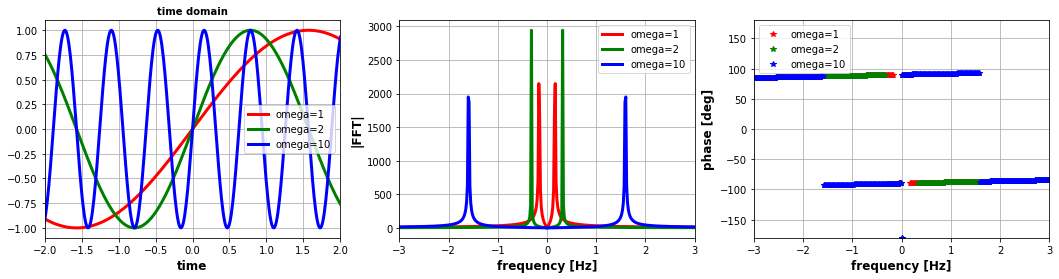

In [64]:
# generate input signal
time = np.linspace(-sim_time/2, sim_time/2, nsamps)
omega=[1,2,10]
cor=['r','g','b']
i=0
plt.figure(figsize=(18,4))
for each_o in omega:
  data=sinal_a(time,each_o)
  yf = fft(data)
  xf = fftfreq(nsamps, 1 / fs)

  plt.subplot(131)
  plt.plot(time, data,cor[i],lw=3,label=f"omega={each_o}")
  plt.xlabel("time")
  plt.title('time domain')
  plt.xlim(x_min,x_max)
  plt.grid()
  plt.legend()

  plt.subplot(132)
  plt.plot(fftshift(xf), np.absolute(fftshift(yf)),cor[i],lw=3,label=f"omega={each_o}")
  plt.xlabel("frequency [Hz]")
  plt.ylabel("|FFT|")
  plt.xlim(-3,3)
  plt.grid()
  plt.legend()

  plt.subplot(133)
  plt.plot(fftshift(xf), np.angle(fftshift(yf),deg=True),cor[i]+'*',lw=1,label=f"omega={each_o}")
  plt.ylim(-180,180)
  plt.xlim(-3,3)
  plt.ylabel("phase [deg]")
  plt.xlabel("frequency [Hz]")
  plt.grid()
  plt.legend()
  i=i+1
plt.savefig("sinal_a_fft.png",dpi=300)

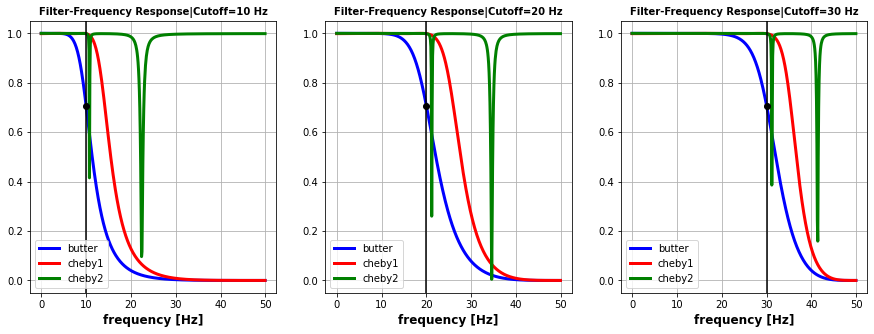

In [65]:
cutoff=[10,20,30]
cor=['r','g','b']
i=0
fig=plt.figure(figsize=(15,5))
  
for each_cut in cutoff:
# define filters
  b_butter, a_butter = butter_lowpass(each_cut, fs, order)
  w_butter, h_butter = freqz(b_butter, a_butter)
  b_cheb1, a_cheb1 = cheby1_lowpass(each_cut, fs,rp, order)
  w_cheb1, h_cheb1 = freqz(b_cheb1, a_cheb1)
  b_cheb2, a_cheb2 = cheby2_lowpass(each_cut, fs,rs, order)
  w_cheb2, h_cheb2 = freqz(b_cheb2, a_cheb2)

  # plot panels
  #plt.subplots_adjust(hspace = .001)
  ax1=fig.add_subplot(1,3,1+i)
  ax1.plot(0.5*fs*w_butter/np.pi, np.abs(h_butter), 'b',lw=3,label='butter')
  ax1.plot(0.5*fs*w_cheb1/np.pi, np.abs(h_cheb1), 'r',lw=3,label='cheby1')
  ax1.plot(0.5*fs*w_cheb2/np.pi, np.abs(h_cheb2), 'g',lw=3,label='cheby2')
  ax1.plot(each_cut, 0.5*np.sqrt(2), 'ko')
  ax1.axvline(each_cut, color='k')
  ax1.set_title(f"Filter-Frequency Response|Cutoff={each_cut} Hz")
  ax1.set_xlabel('frequency [Hz]')
  ax1.legend(loc='lower left')
  ax1.grid()
  i=i+1
plt.savefig('filters.png',dpi=300)